# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

데이터 살펴보기

In [2]:
df = pd.read_excel('BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [3]:
# 결측값 없음
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

## 데이터 분포 확인하기

> feature별 히스토그램을 통해 오류값 확인하기

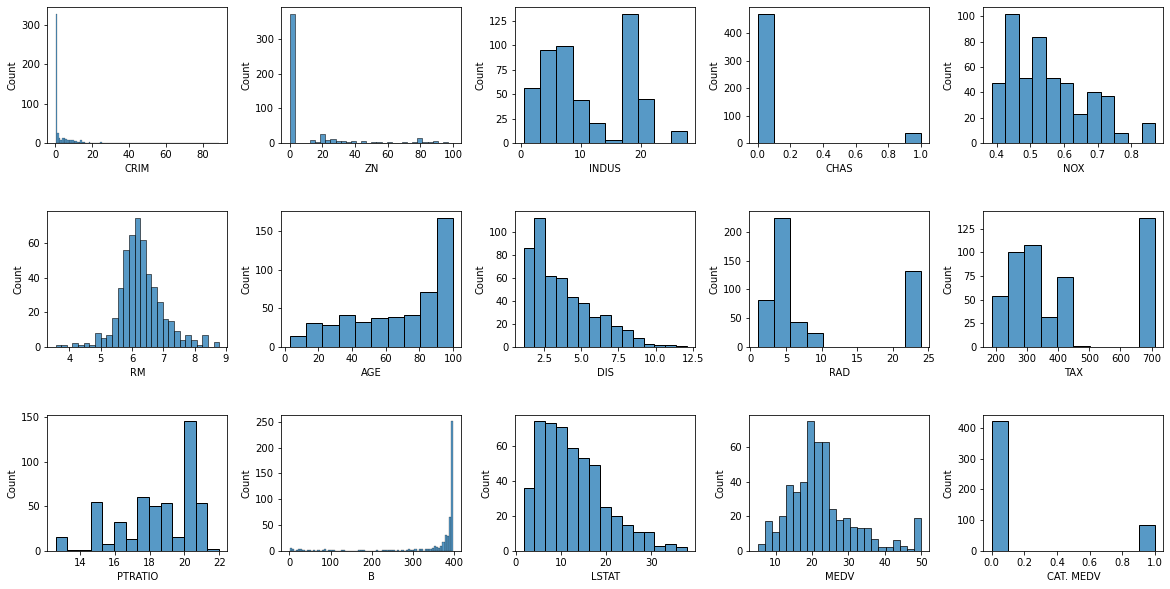

In [4]:
# feature별 히스토그램을 통해 오류값 확인하기
def hist_plt(df):
    fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (20, 10)) # 그래프 틀 생성
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

    idx, col = 0, 0
    for i, feat in enumerate(df.columns):
        sns.histplot(df[feat], ax=ax[idx, col])
        col += 1
        if (i+1) % 5 == 0:
            idx += 1
        if col == 5:
            col = 0

    plt.show()

hist_plt(df)

```python
[위 그래프를 통해 알 수 있는 점]
feature 특성 상 'RAD', 'TAX' 의 이상값이 오류로 판단됨
- 'RAD'(고속도로 접근성 지수)가 다른 수치와 너무 동떨어져 있으며, 게다가 9~23까지 범위의 
  해당값이 없다가 24라는 수치에 몰려있다는 것을 통해 오류값으로 판정
    
- 'TAX'(재산세율)의 격차가 너무 큰 것이 이상점인지(극심한 빈부격차의 결과인지) 확인 결과 
  666과 711 단 두가지 값만이 상위 분포를 차지하고 있음. 재산세율의 상위값 666, 711 분포가 
  너무 편협적이라는 점, 총 137개의 구역이 일괄적인 재산세율을 가질 수 없다는 점을 고려해 해당 값을 오류로 판단.
```

> 위 그래프를 토대로 추가로 확인한 내역

In [5]:
# value_counts 확인하기
print('[RAD value_counts]')
print(df['RAD'].value_counts())
print('---------')
print('---------')
print('[TAX value_counts]')
print(df['TAX'].value_counts())

[RAD value_counts]
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64
---------
---------
[TAX value_counts]
666    132
307     40
403     30
437     15
304     14
      ... 
285      1
198      1
256      1
244      1
313      1
Name: TAX, Length: 66, dtype: int64


In [6]:
# TAX 600 이상인 결과 중 TAX의 value_counts 확인
df[df['TAX'] > 600]['TAX'].value_counts()

666    132
711      5
Name: TAX, dtype: int64

---

### 오류값으로 판단되는 행 제거

In [7]:
# 'RAD' 24값과 'TAX' 666 이상의 값을 지닌 index drop
tmp = df.copy()
drop_index = tmp[(tmp['RAD'] == 24) | (tmp['TAX'] >= 666)].index
df_fixed = tmp.drop(drop_index).reset_index(drop=True)
df_fixed.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [8]:
# CHAS 와 CAT.MEDV는 분류 값을 가지므로, 수치데이터만 포함된 df를 따로 만든다.
df_num = df_fixed.copy()
df_num.drop(['CHAS', 'CAT. MEDV'], axis=1, inplace=True)
df_num

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
365,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
366,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
367,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


>feature 간 상관관계 살펴보기

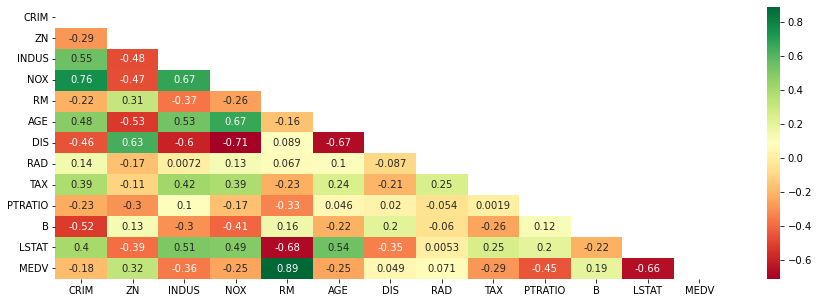

In [9]:
# feature 간 상관관계 살펴보기
def heatmap_plt(df):
    corr = df.corr()

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5)) # 그래프 틀 생성
    fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(df.corr(), annot=True, mask=mask, fmt='.2g', cmap='RdYlGn', ax=ax)
    plt.show()
    
heatmap_plt(df_num)

- 음의 상관관계는 feature이름 옆에 '-' 기호를 붙임  
- 0.6 언저리 이상의 데이터만 정리
- 아래 데이터를 중심으로 상관관계를 본다.
```python
'CRIM' : ['NOX']
'ZN' : ['DIS']
'INDUS' : ['NOX', -'DIS']
'NOX' : ['AGE', -'DIS']
'RM' : [-'LSTAT', 'MEDV']
'AGE' : [-'DIS']
'LSTAT' : [-'MEDV']
```

In [10]:
# preprocessing.MinMaxScaler 적용하기
# scaler = preprocessing.MinMaxScaler()
# normalized_data = scaler.fit_transform(df_num)
# df_norm = pd.DataFrame(normalized_data, columns=df_num.columns)
# df_norm

# preprocessing.StandardScaler() 적용하기
# scaler = preprocessing.StandardScaler()
# standardized_data = scaler.fit_transform(df_num)
# df_stand = pd.DataFrame(standardized_data, columns=df_num.columns)
# df_stand

> 상관관계가 비교적 높은 feature 후보들의 상관관계 보기

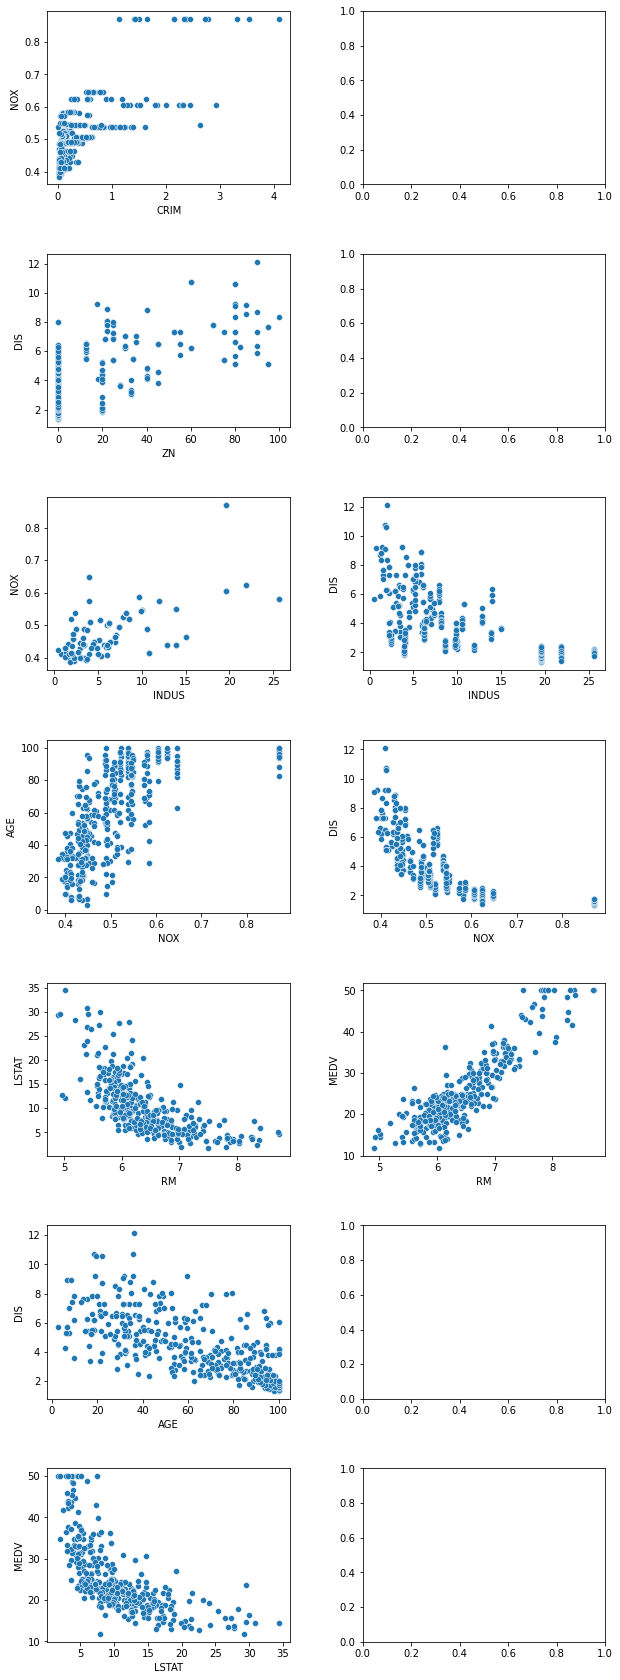

In [11]:
# feature 후보들의 상관관계 보기
def scatter_plt(df):
    fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 30)) # 그래프 틀 생성
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

    columns_list = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT']
    corr_dict = {

        'CRIM' : ['NOX'],
        'ZN' : ['DIS'],
        'INDUS' : ['NOX', 'DIS'],
        'NOX' : ['AGE', 'DIS'],
        'RM' : ['LSTAT', 'MEDV'],
        'AGE' : ['DIS'],
        'LSTAT' : ['MEDV']
    }
    for col, feat_x in enumerate(corr_dict.keys()):
        for idx, feat_y in enumerate(corr_dict[feat_x]):
            x, y = feat_x, feat_y 
            sns.scatterplot(df[x], df[y], ax=ax[col, idx])

    plt.show()

scatter_plt(df_num)

```python
[위 그래프를 통해 확인할 수 있는 점]

# 집값과의 상관관계
'MEDV'와 'RM'이 양의 상관관계를 보임  
- 방 개수가 많을 수록 집값이 올라감(어찌보면 당연한 결과)  

'MEDV'와 'LSTAT'이 음의 상관관계를 보임
- 집값이 저렴한 지역일수록 하위계층의 비율이 높아지는 것으로 추정

'LSTAT'와 'RM'이 음의 상관관계를 보임
- 방 개수가 적은 지역일수록 하위계층의 거주 비율이 높아지는 것으로 추정

정리: 그 지역의 집값을 통해 해당 구역 거주민의 계층을 어느정도 예측할 수 있음

# 기타 특이점
'AGE', 'DIS', 'INDUS', 'NOX', 'CRIM' 에서 여러 상관 관계를 보임
- 'NOX' 수치는 비소매산업지역(공장부지정도로 이해함), 'AGE'(오래된 건물이 많은 곳) 등 비교적 도시 발전이 이루어 지지
  않은 곳일수록 높게 나온다.
- 'DIS'가 높은 지역이 전반적으로 도시 발전(번화가)이 진행된 것으로 보여진다.
- 'NOX' 수치가 높은 곳, 즉 발전이 더디거나 공단 지역일 것으로 보여지는 지역의 'CRIM' 비율이
  매우 높게 나타나고 있다. 우범지역임으로 인해 범죄율이 높은 것인지, 전체 인구수
  자체가 매우 낮을 것으로 예상되는 지역이어서 높은 것인지 추가 판단이 필요하다.

정리: 일산화질소량으로 해당 지역이 도심에 가까운지에 대한 유무를 어느정도 파악할 수
    있을 것 같다.

```

> feature별 분포 확인을 통한 보스턴 지역 특성 파악하기

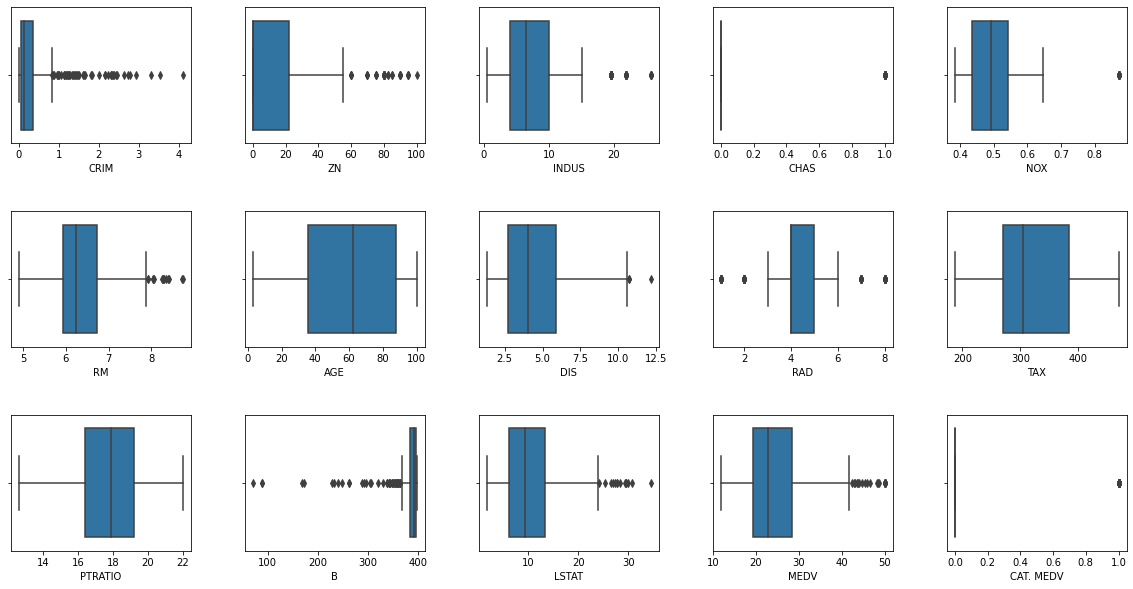

In [12]:
# feature 별 boxplot을 통해 극단값 및 분포 정도 비교하기
def boxplot_plt(df):
    fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (20, 10)) # 그래프 틀 생성
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

    idx, col = 0, 0
    for i, feat in enumerate(df.columns):
        sns.boxplot(df[feat], ax=ax[idx, col])
        col += 1
        if (i+1) % 5 == 0:
            idx += 1
        if col == 5:
            col = 0

    plt.show()

boxplot_plt(df_fixed)

```python
[위 그래프를 통해 확인할 수 있는 점]
1. 보스턴 지역은 흑인의 비율('B')이 상당히 높다.
2. 1인당 범죄율('CRIM')이 대체적으로 1 이하를 차지하지만 아웃라이어가 존재한다.
3. 'AGE'의 중앙값을 통해 보스턴 지역의 60% 가량이 30년 이상 된 건물에 속한다.
```

---

In [13]:
# 이상점 계산 함수
def low_outlier(series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    return series.quantile(0.25) - iqr * 1.5

def high_outlier(series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    return series.quantile(0.75) + iqr * 1.5
    

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평수
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

 
| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

### 아래 그래프를 다시 참조하면서 접근

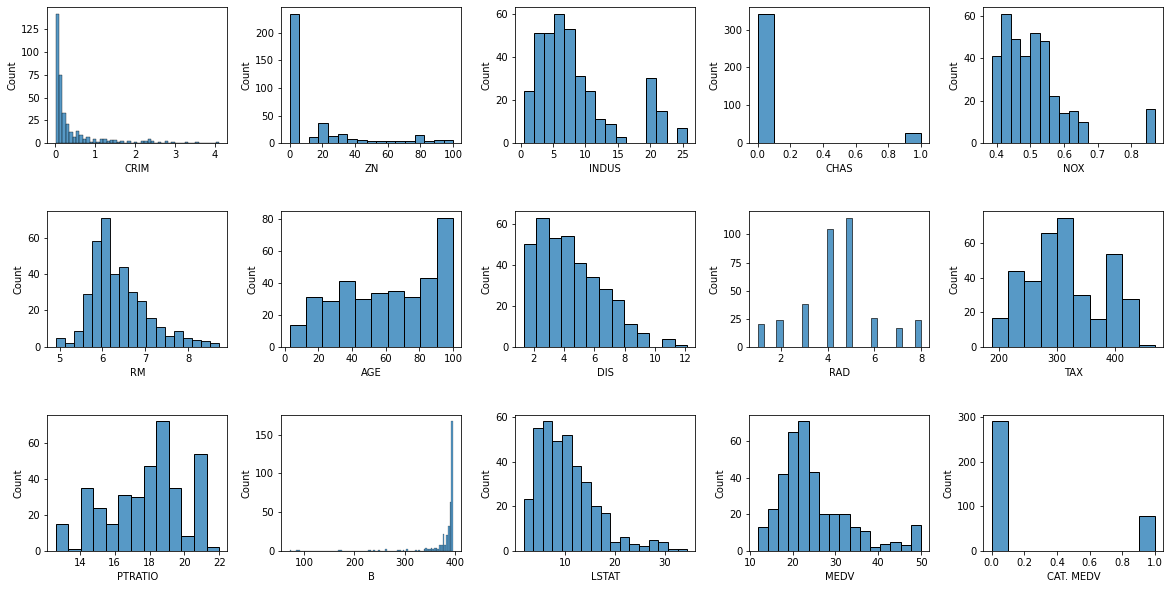

In [14]:
hist_plt(df_fixed)

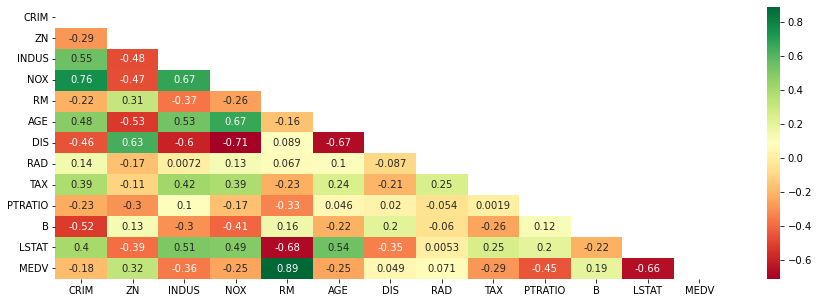

In [15]:
heatmap_plt(df_num)

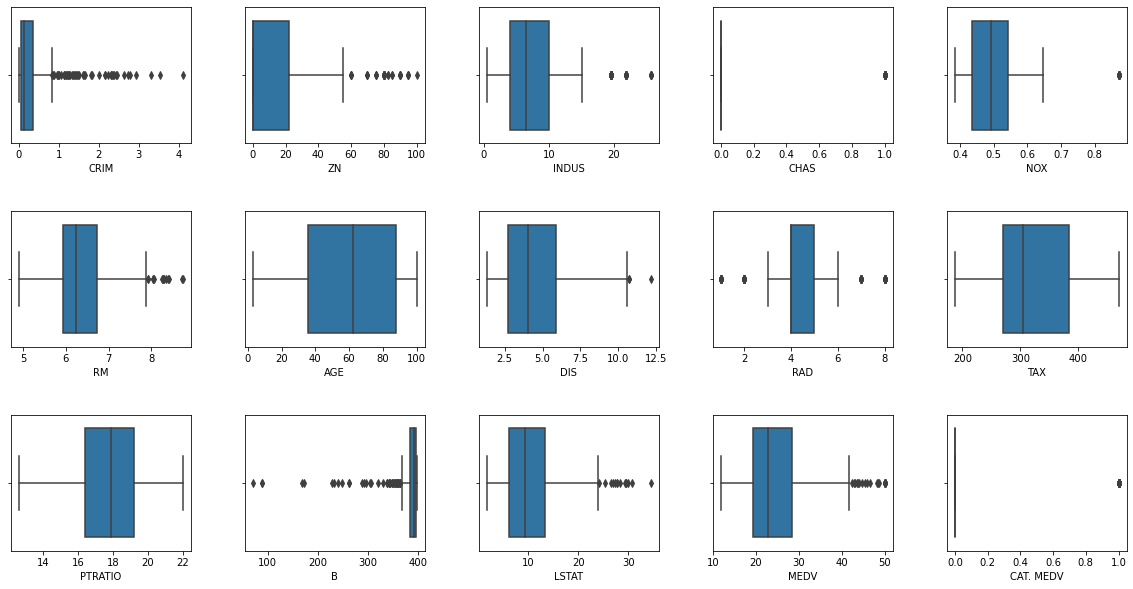

In [16]:
boxplot_plt(df_fixed)

---

### 범죄율이 이상점 이상을  차지하는 지역의 특징

In [17]:
# 이상점에 해당하는 범죄율을 지닌 지역
df_fixed[df_fixed['CRIM'] >= high_outlier(df_fixed['CRIM'])].describe()[['CRIM', 'AGE']]

,CRIM,AGE
count,48.000000,48.000000
mean,1.780197,92.116667
std,0.765990,13.380445
min,0.840540,29.300000
25%,1.203800,91.775000
50%,1.507670,95.450000
75%,2.318172,98.250000
max,4.097400,100.000000


```python
해당 지역의 평균 90% 이상이 30년 이상 된 오래된 주택으로 구성되어 있다.
주택 등 건물의 노후화된 모습이 낙후된 도심 분위기가 형성되어 그만큼
범죄율이 높은 것이 아닐까 추측해본다.
```

### 대형평수 vs 소형 평수

```python
이상값 이상에 해당하는 방 개수를 가진 지역과 그 외 지역을 비교해보았다.
```

In [18]:
# 이상값 지점 계산 함수
def low_outlier(series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    return series.quantile(0.25) - iqr * 1.5

def high_outlier(series):
    iqr = series.quantile(0.75) - series.quantile(0.25)
    return series.quantile(0.75) + iqr * 1.5

In [21]:
# 모든 feature에 대한 평균, 중앙값 산출
room_many_mean = df_fixed[df_fixed['RM'] >= high_outlier(df_fixed['RM'])].describe().loc['mean', :]
room_normal_mean = df_fixed[df_fixed['RM'] < high_outlier(df_fixed['RM'])].describe().loc['mean', :]

room_many_median = df_fixed[df_fixed['RM'] >= high_outlier(df_fixed['RM'])].describe().loc['50%', :]
room_normal_median = df_fixed[df_fixed['RM'] < high_outlier(df_fixed['RM'])].describe().loc['50%', :]

print(f"ourlier: {high_outlier(df_fixed['RM'])}")
print(f"room_many_count: {len(df_fixed[df_fixed['RM'] >= high_outlier(df_fixed['RM'])])}")
print(f"room_norm_count: {len(df_fixed[df_fixed['RM'] < high_outlier(df_fixed['RM'])])}")

concat_data = np.vstack([room_many_mean, room_normal_mean, room_many_median, room_normal_median])
index_list = ['room_many_mean', 'room_normal_mean', 'room_many_median', 'room_normal_median']

pd.DataFrame(concat_data, index=index_list, columns=room_many_mean.index)

ourlier: 7.918000000000001
room_many_count: 14
room_norm_count: 355


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
room_many_mean,0.563947,19.071429,6.765000,0.142857,0.521293,8.257357,69.150000,3.615621,5.642857,297.214286,15.771429,387.000714,4.114286,46.621429,1.000000
room_normal_mean,0.381866,15.445070,8.486197,0.070423,0.511475,6.314285,60.296338,4.473832,4.408451,312.507042,17.889577,380.807606,10.666028,23.998873,0.183099
room_many_median,0.451140,0.000000,6.030000,0.000000,0.505500,8.262500,77.150000,3.055050,5.000000,307.000000,16.050000,387.120000,3.825000,49.400000,1.000000
room_normal_median,0.128160,0.000000,6.910000,0.000000,0.493000,6.211000,61.500000,4.095200,4.000000,304.000000,18.200000,392.850000,9.510000,22.500000,0.000000


```python
아웃라이어 이상의 방 개수를 가진 지역의 집값은 모두 30000 달러가 넘었다.
이상값에 해당하는 지역의 범죄율이 일반 지역보다 더 높았다.
의외였던 점은 재산세율에 큰 차이가 없다는 점이었다.
```

### 노후화 정도와 집값의 관계

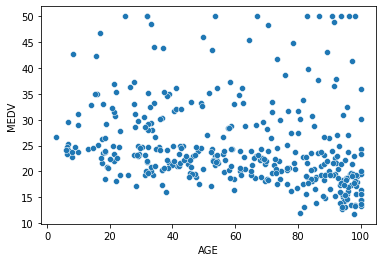

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1) # 그래프 틀 생성
plt.subplots_adjust(wspace=0.3, hspace=0.4)
fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

sns.scatterplot(df_fixed['AGE'], df_fixed['MEDV'], ax=ax)
plt.show()

```python
scatter plot을 통해 봤을 때는 집의 노후화 정도가 집값에 크게 영향을 끼치지 않는 것으로 보인다.
```

### 직장과 주거공간이 가까운 것에 따른 차이

In [23]:
# 'DIS'가 상위 25%에 해당하는 지역을 직주근접으로 보고 하위 75%와 비교
df_fixed['DIS'].describe()

count    369.000000
mean       4.441272
std        2.097985
min        1.321600
25%        2.714700
50%        4.052200
75%        5.873600
max       12.126500
Name: DIS, dtype: float64

In [24]:
# 모든 feature에 대한 평균, 중앙값 산출
dis_close_mean = df_fixed[df_fixed['DIS'] >= df_fixed['DIS'].quantile(0.75)].describe().loc['mean', :]
dis_far_mean = df_fixed[df_fixed['DIS'] < df_fixed['DIS'].quantile(0.75)].describe().loc['mean', :]

dis_close_median = df_fixed[df_fixed['DIS'] >= df_fixed['DIS'].quantile(0.75)].describe().loc['50%', :]
dis_far_median = df_fixed[df_fixed['DIS'] < df_fixed['DIS'].quantile(0.75)].describe().loc['50%', :]

print(f"구분 지점: {df_fixed['DIS'].quantile(0.75)}")
print(f"dis_close_count: {len(df_fixed[df_fixed['DIS'] >= df_fixed['DIS'].quantile(0.75)])}")
print(f"room_noDIS_count: {len(df_fixed[df_fixed['DIS'] < df_fixed['DIS'].quantile(0.75)])}")

concat_data = np.vstack([dis_close_mean, dis_far_mean, dis_close_median, dis_far_median])
index_list = ['dis_close_mean', 'dis_far_mean', 'dis_close_median', 'dis_far_median']

pd.DataFrame(concat_data, index=index_list, columns=dis_close_mean.index)

구분 지점: 5.8736
dis_close_count: 93
room_noDIS_count: 276


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
dis_close_mean,0.081905,41.064516,4.345269,0.010753,0.433289,6.454624,39.153763,7.358395,4.268817,309.849462,17.268817,388.317742,8.323548,25.126882,0.236559
dis_far_mean,0.492176,6.996377,9.794203,0.094203,0.538318,6.365558,67.869565,3.458328,4.518116,312.626812,17.991304,378.591159,11.123007,24.766304,0.206522
dis_close_median,0.053600,30.000000,4.390000,0.000000,0.431000,6.430000,34.500000,7.037900,4.000000,311.000000,16.900000,392.850000,7.370000,23.400000,0.000000
dis_far_median,0.190110,0.000000,8.140000,0.000000,0.517500,6.171500,73.350000,3.417800,5.000000,304.000000,18.350000,392.780000,9.970000,22.600000,0.000000


```python
직장과 거리가 가까운 지역과 그렇지 않은 지역의 범죄율이 약 6배 정도(평균값 기준) 차이가 난다.
직주근접지역이 그렇지 않은 지역보다 약 7배 높은 넓은 거주지역 비율을 차지하고 있다.
INDUS 수치가 직주근접지역이 2배 가량 낮은 것을 확인할 수 있다.

- 직주가 근접하지 않은 지역은 도심이 아닌 산업 지역 또는 그 외 지역일 것으로 예상되며
  직주근접지역은 한 지역 내 직장과 주거공간이 공존하는 지역으로 보인다.

```

### 찰스강 주변이 그렇지 않은 지역과 차이가 있을까?

In [25]:
df_fixed.groupby(['CHAS'], as_index=False).mean()

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0,0.365077,16.023392,8.207427,0.508274,6.379763,59.615205,4.525256,4.415205,312.602339,17.897661,381.687573,10.317047,24.642690,0.207602
1,1,0.688940,10.000000,11.124815,0.557107,6.492407,73.514815,3.377467,4.962963,303.370370,16.688889,372.872593,11.689259,27.574074,0.296296


```python
찰스강 주변과 그 외 지역의 'CRIM' dl 이 약 2배 가량 차이난다.
그외 명확한 차이 안보임
```

### 직장이 가까우면서 소형 평수인 부동산의 가격은?
- 보스턴 하위 25% 이하의 방 개수를 가진 지역을 소형 평수로 보고 해당 지역에서 가장 직주근접한 지역의 집 가격을 본다.
- DIS 전체의 몇 %에 해당하는지 확인해본다.

In [26]:
# 상위 5%에 해당하는 직주근접 지역
close_home = df_fixed[df_fixed['DIS'] >= df_fixed['DIS'].quantile(0.95)]
# 상위 5% 직주근접 지역 중 하위 10% 방 개수 지역
close_home[close_home['RM'] <= df_fixed['RM'].quantile(0.1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.8,8.05,18.2,0


```python
보스턴 전체에서 상위 5%의 직주근접한 지역(10.5)에서 보스턴 전체에서 하위 10% 내 방 개수(5.6)를 가진 
지역의 부동산 가격은 18200 달러에 구매 가능하다. (단 한군데)

해당 지역은 거주비율이 높은 도심인 것으로 보이며, 전체 주택의 약 80%가 지은지 약 30년 이하의 건물이다.
교사 대비 학생의 비율이 22%로 보스턴에서 가장 높은 비율을 차지하고 있다.
```

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>